In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

In [3]:
numerical.dtypes

TCODE         int64
AGE         float64
INCOME        int64
WEALTH1       int64
HIT           int64
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2      int64
Length: 315, dtype: object

In [4]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [5]:
targets.dtypes

TARGET_B      int64
TARGET_D    float64
dtype: object

In [6]:
numerical.isna().sum()

TCODE       0
AGE         0
INCOME      0
WEALTH1     0
HIT         0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 315, dtype: int64

In [7]:
numerical.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [8]:
numerical.describe()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,954

In [9]:
null_percent_num = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
null_percent_num
null_percent_num.columns = ['column_name', 'nulls_percentage']
null_percent_num

,column_name,nulls_percentage
0,TCODE,0.0
1,AGE,0.0
2,INCOME,0.0
3,WEALTH1,0.0
4,HIT,0.0
...,...,...
310,AVGGIFT,0.0
311,CONTROLN,0.0
312,HPHONE_D,0.0
313,RFA_2F,0.0


In [10]:
# drop income, wealth

In [11]:
# numerical = numerical.drop(['INCOME', 'WEALTH1','WEALTH2'], axis = 1)

In [12]:
# numerical['INCOME'] = numerical['INCOME'].astype('object')


In [13]:
# numerical['WEALTH1'] = numerical['WEALTH1'].astype('object')

In [14]:
# numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')

In [15]:
# numerical['HPHONE_D'] = numerical['HPHONE_D'].astype('object')

In [16]:
# numerical['RFA_2F'] = numerical['RFA_2F'].astype('object')

In [17]:
numerical.dtypes

TCODE         int64
AGE         float64
INCOME       object
WEALTH1      object
HIT           int64
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D     object
RFA_2F       object
CLUSTER2      int64
Length: 315, dtype: object

In [18]:
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3


In [19]:
categorical.isna().sum()

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
ODATEW_YR       0
ODATEW_MM       0
DOB_YR          0
DOB_MM          0
MINRDATE_YR     0
MINRDATE_MM     0
MAXRDATE_YR     0
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
dtype: int64

In [20]:
categorical.dropna()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,96,1,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,96,1,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,95,1,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,86,1,40,5,90,11,96,8,97,1,86,12


In [21]:
targets.dtypes

TARGET_B      int64
TARGET_D    float64
dtype: object

In [22]:
targets['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [23]:
targets['TARGET_D'].value_counts(dropna = False)

0.00     90569
10.00      941
15.00      591
20.00      577
5.00       503
         ...  
18.25        1
10.70        1
2.50         1
16.87        1
44.21        1
Name: TARGET_D, Length: 71, dtype: int64

In [24]:
Y = targets
y_B = targets['TARGET_B']
y_D = targets['TARGET_D']

In [25]:
X = pd.concat((numerical, categorical), axis = 1)
X.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18

In [26]:
X_num = X.select_dtypes(np.number)
X_num.shape

(95412, 325)

In [27]:
X_cat = X.select_dtypes(object)
X_cat.shape

(95412, 12)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(X_num)

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=30).fit_transform(numerical_scaled, y_B) 
kbest

selected = pd.DataFrame(kbest)
selected.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.010101,0.079833,0.105833,0.230769,0.153846,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.020202,0.050505,0.171717,0.000000,0.040404,0.020202,0.433333,0.366492,0.127119,0.341463,0.622951,0.333333,0.428571,0.0,1.000000,0.0,1.0
1,0.000000,0.911333,0.869667,0.923077,0.769231,0.000000,0.000000,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.919192,0.919192,0.919192,0.478632,0.020202,0.323232,0.183333,0.146597,0.008475,0.024390,0.000000,0.000000,0.785714,0.0,0.090909,0.0,1.0
2,0.020202,0.082833,0.091000,0.153846,0.076923,0.000000,0.010101,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.000000,0.020202,0.090909,0.000000,0.202020,0.010101,0.416667,0.308901,0.110169,0.341463,0.967213,0.333333,0.500000,0.0,0.090909,0.0,1.0
3,0.000000,0.166667,0.210500,0.153846,0.076923,0.000000,0.000000,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.010101,0.080808,0.171717,0.997863,0.353535,0.050505,0.433333,0.324607,0.063559,0.170732,0.655738,0.333333,0.285714,0.0,0.000000,0.0,1.0
4,0.989899,0.096000,0.099000,0.307692,0.230769,0.381818,0.585859,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.252525,0.585859,0.747475,0.534188,0.212121,0.030303,0.700000,0.570681,0.152542,0.195122,0.409836,0.333333,0.214286,0.0,0.000000,0.5,0.0


In [30]:
kbest = SelectKBest(chi2, k=30).fit(numerical_scaled, y_B)
df = pd.DataFrame(data = kbest.scores_, columns = ['score'])
df['Column'] = X_num.columns
df
print(df.sort_values(by = ['score'], ascending = False).head(30))

cols = df.sort_values(by = ['score'], ascending = False).head(30)['Column']
selected.columns = cols
selected.head()

         score       Column
321  50.439150  LASTDATE_YR
302  27.516508     CARDGIFT
107  26.474583         HVP1
108  25.757492         HVP2
109  21.545080         HVP3
112  19.261394         HVP6
110  14.874056         HVP4
19   13.034181         ETH2
126  12.581538          RP1
127  11.022637          RP2
313   9.965055    ODATEW_YR
301   8.909015     NGIFTALL
80    8.309269          HV1
81    8.260178          HV2
105   7.470098        ETHC5
104   7.224822        ETHC4
312   7.087851     DOMAIN_B
296   7.083556     CARDPROM
322   6.793793  LASTDATE_MM
297   6.744744      NUMPROM
316   6.371308       DOB_MM
314   6.114012    ODATEW_MM
128   5.622626          RP3
111   5.545304         HVP5
309   4.838850     CLUSTER2
83    3.847846          HV4
82    3.772977          HV3
147   2.894568         IC15
130   2.873016          MSA
155   2.838548         IC23


Column,LASTDATE_YR,CARDGIFT,HVP1,HVP2,HVP3,HVP6,HVP4,ETH2,RP1,RP2,ODATEW_YR,NGIFTALL,HV1,HV2,ETHC5,ETHC4,DOMAIN_B,CARDPROM,LASTDATE_MM,NUMPROM,DOB_MM,ODATEW_MM,RP3,HVP5,CLUSTER2,HV4,HV3,IC15,MSA,IC23
0,0.010101,0.079833,0.105833,0.230769,0.153846,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.020202,0.050505,0.171717,0.000000,0.040404,0.020202,0.433333,0.366492,0.127119,0.341463,0.622951,0.333333,0.428571,0.0,1.000000,0.0,1.0
1,0.000000,0.911333,0.869667,0.923077,0.769231,0.000000,0.000000,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.919192,0.919192,0.919192,0.478632,0.020202,0.323232,0.183333,0.146597,0.008475,0.024390,0.000000,0.000000,0.785714,0.0,0.090909,0.0,1.0
2,0.020202,0.082833,0.091000,0.153846,0.076923,0.000000,0.010101,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.000000,0.020202,0.090909,0.000000,0.202020,0.010101,0.416667,0.308901,0.110169,0.341463,0.967213,0.333333,0.500000,0.0,0.090909,0.0,1.0
3,0.000000,0.166667,0.210500,0.153846,0.076923,0.000000,0.000000,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.010101,0.080808,0.171717,0.997863,0.353535,0.050505,0.433333,0.324607,0.063559,0.170732,0.655738,0.333333,0.285714,0.0,0.000000,0.0,1.0
4,0.989899,0.096000,0.099000,0.307692,0.230769,0.381818,0.585859,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.252525,0.585859,0.747475,0.534188,0.212121,0.030303,0.700000,0.570681,0.152542,0.195122,0.409836,0.333333,0.214286,0.0,0.000000,0.5,0.0


In [31]:
kbest = SelectKBest(chi2, k=30).fit(numerical_scaled, y_B)
df = pd.DataFrame(data = kbest.scores_, columns = ['score'])
df['Column'] = X_num.columns
df
print(df.sort_values(by = ['score'], ascending = False).head(30))

cols = df.sort_values(by = ['score'], ascending = False).head(30)['Column']
selected.columns = cols
selected.head()

         score       Column
321  50.439150  LASTDATE_YR
302  27.516508     CARDGIFT
107  26.474583         HVP1
108  25.757492         HVP2
109  21.545080         HVP3
112  19.261394         HVP6
110  14.874056         HVP4
19   13.034181         ETH2
126  12.581538          RP1
127  11.022637          RP2
313   9.965055    ODATEW_YR
301   8.909015     NGIFTALL
80    8.309269          HV1
81    8.260178          HV2
105   7.470098        ETHC5
104   7.224822        ETHC4
312   7.087851     DOMAIN_B
296   7.083556     CARDPROM
322   6.793793  LASTDATE_MM
297   6.744744      NUMPROM
316   6.371308       DOB_MM
314   6.114012    ODATEW_MM
128   5.622626          RP3
111   5.545304         HVP5
309   4.838850     CLUSTER2
83    3.847846          HV4
82    3.772977          HV3
147   2.894568         IC15
130   2.873016          MSA
155   2.838548         IC23


Column,LASTDATE_YR,CARDGIFT,HVP1,HVP2,HVP3,HVP6,HVP4,ETH2,RP1,RP2,ODATEW_YR,NGIFTALL,HV1,HV2,ETHC5,ETHC4,DOMAIN_B,CARDPROM,LASTDATE_MM,NUMPROM,DOB_MM,ODATEW_MM,RP3,HVP5,CLUSTER2,HV4,HV3,IC15,MSA,IC23
0,0.010101,0.079833,0.105833,0.230769,0.153846,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.020202,0.050505,0.171717,0.000000,0.040404,0.020202,0.433333,0.366492,0.127119,0.341463,0.622951,0.333333,0.428571,0.0,1.000000,0.0,1.0
1,0.000000,0.911333,0.869667,0.923077,0.769231,0.000000,0.000000,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.919192,0.919192,0.919192,0.478632,0.020202,0.323232,0.183333,0.146597,0.008475,0.024390,0.000000,0.000000,0.785714,0.0,0.090909,0.0,1.0
2,0.020202,0.082833,0.091000,0.153846,0.076923,0.000000,0.010101,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.000000,0.020202,0.090909,0.000000,0.202020,0.010101,0.416667,0.308901,0.110169,0.341463,0.967213,0.333333,0.500000,0.0,0.090909,0.0,1.0
3,0.000000,0.166667,0.210500,0.153846,0.076923,0.000000,0.000000,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.010101,0.080808,0.171717,0.997863,0.353535,0.050505,0.433333,0.324607,0.063559,0.170732,0.655738,0.333333,0.285714,0.0,0.000000,0.0,1.0
4,0.989899,0.096000,0.099000,0.307692,0.230769,0.381818,0.585859,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.252525,0.585859,0.747475,0.534188,0.212121,0.030303,0.700000,0.570681,0.152542,0.195122,0.409836,0.333333,0.214286,0.0,0.000000,0.5,0.0


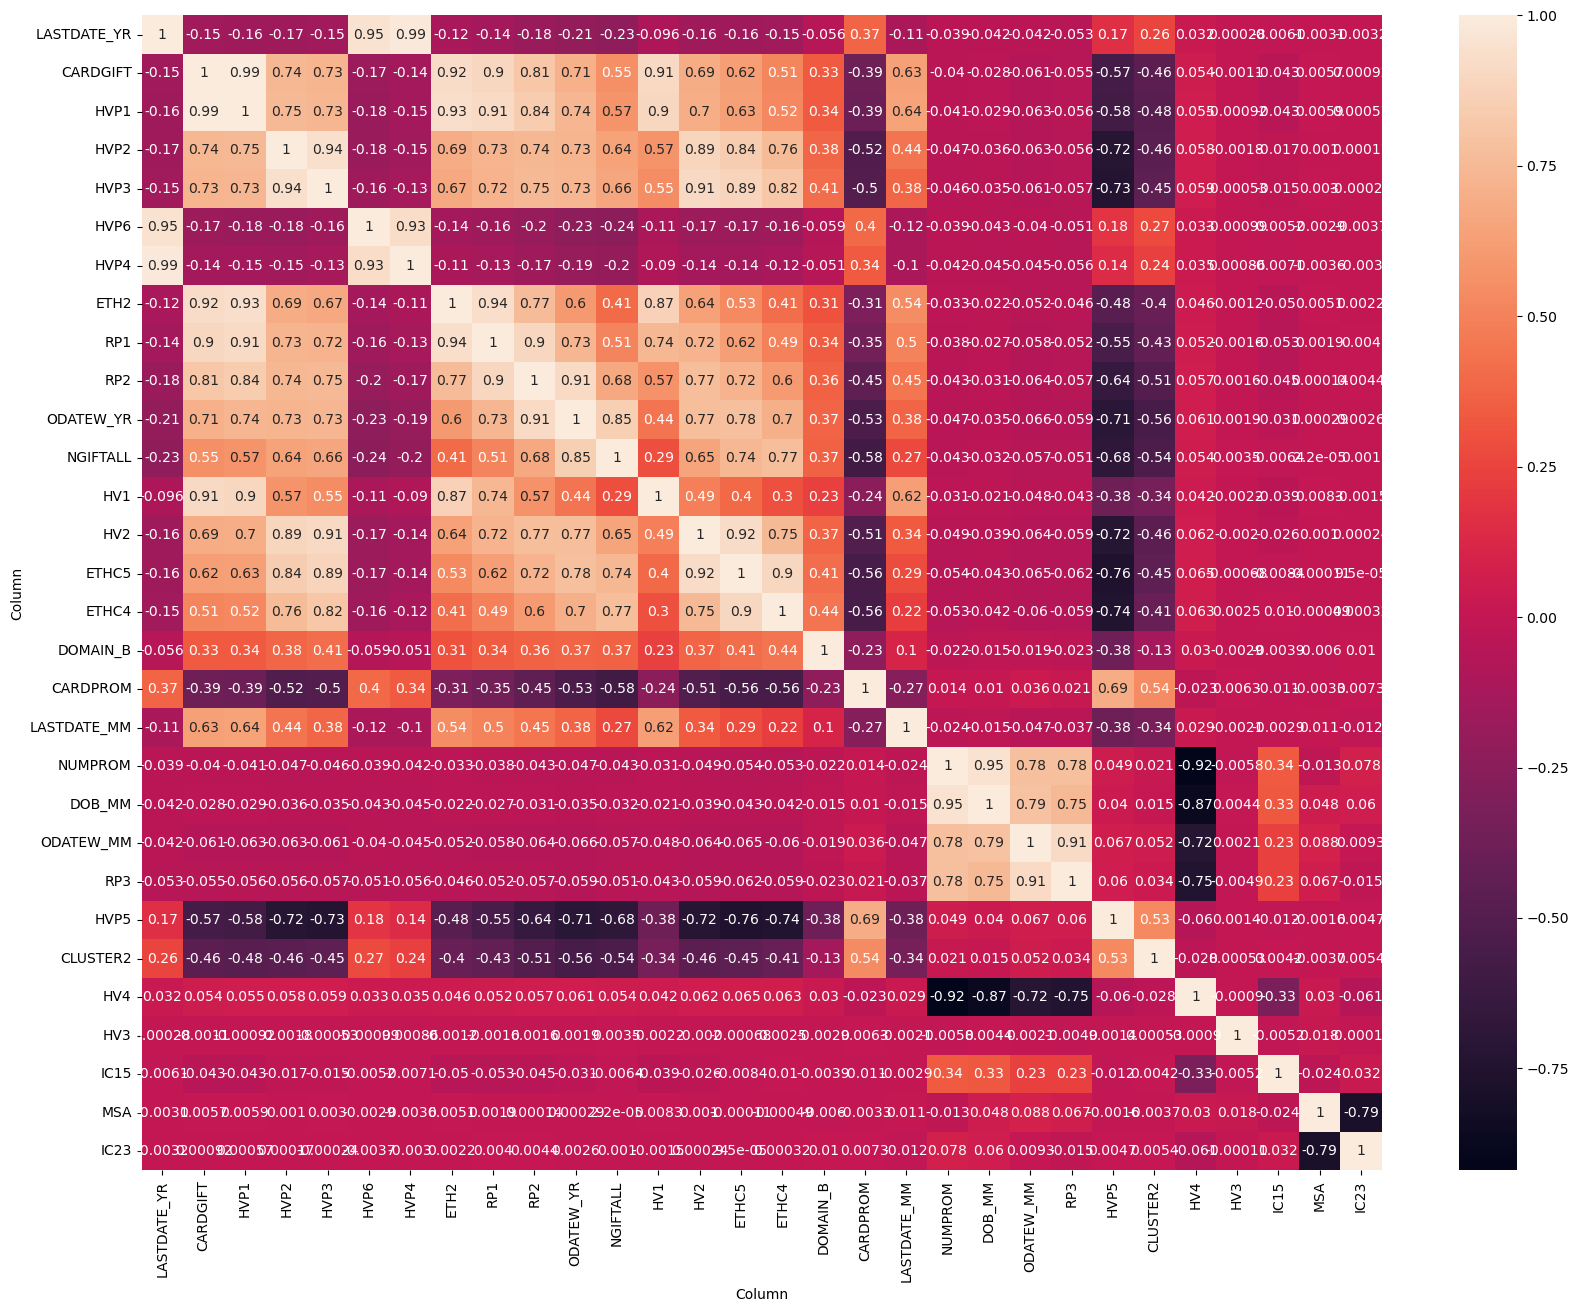

In [32]:
corr_matrix = selected.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)

In [34]:
features = pd.concat((X_num, X_cat), axis = 1)
features.head(3)

,TCODE,AGE,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,INCOME,WEALTH1,WEALTH2,HPHONE_D,RFA_2F,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,0,60.000000,0,0,39,34,18,10,2,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,39,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11,5,9,5,0,4,IL,H,F,L,E,C,T
1,1,46.000000,16,0,15,55,11,6,2,1,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,1,14,3,1,94,1,52,2,93,10,95,12,95,12,93,10,6,9,9,0,2,CA,H,M,L,G,A,S
2,1,61.611649,2,0,20,29,33,6,8,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y_B, random_state=0)

In [36]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,TCODE,AGE,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
4398,0,66.000000,1,0,29,15,48,8,7,1,2707,662,1002,0,95,5,44,56,71,28,0,0,1,0,0,0,0,0,0,0,1,0,0,0,37,50,55,41,52,56,27,35,41,23,11,17,15,12,12,14,21,14,15,32,24,15,40,22,39,32,30,38,24,11,5,49,12,19,20,159,248,77,75,4,15,11,9,8,8,0,464,518,2,2,63,37,89,11,12,34,66,49,21,78,22,13,1,12,10,29,2,12,33,26,10,15,4,0,1,6,16,44,0,3,39,50,52,13,4,9,6,7,21,6,8,1,1,5,19,51,0.0,247.0,692.0,166,214,242,289,9367,45,21,10,12,7,5,0,0,0,36,20,11,15,9,7,1,0,0,40,15,31,27,44,56,6,64,26,0,0,0,0,0,7,3,1,9,11,18,5,32,51,65,40,57,38,75,37,82,99,8,16,6,1,11,9,1,2,18,4,12,8,5,6,0,1,6,23,2,1,2,26,2,4,4,1,6,13,7,3,8,7,1,9,68,6,1,120,18,22,28,14,3,6,9,2,25,1,22,4,0,0,0,13,29,1,15,11,48,9,0,6,1,3,0,0,10,1,0,0,0,0,0,1,0,2,83,95,2,0,2,86,45,13,7,23,2,4,15,48,73,27,0,0,54,7,34,0,0,4,99,0,90,99,87,9,2,6,7,12,30,6,14,85.0,7,5,5.0,15.0,10.0,4,12.142857,118666,61,48,3,2,95,1,32,1,94,10,95,7,96,3,94,10
90538,0,61.611649,0,1,37,33,33,8,18,7,22773,6139,9385,0,85,15,48,52,97,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,35,42,44,36,46,48,26,37,42,21,10,20,25,16,11,10,8,14,16,34,21,15,22,10,21,30,33,37,21,7,2,57,13,8,22,160,238,64,61,6,27,21,10,2,1,1,655,709,3,3,65,35,95,5,19,34,65,52,25,80,20,9,2,8,15,23,4,21,59,17,0,0,0,1,3,11,32,80,0,5,47,59,56,13,4,21,6,8,9,14,9,1,4,13,45,78,0.0,297.0,766.0,276,359,329,398,13994,24,19,19,18,15,3,1,0,1,14,15,19,23,21,5,1,1,1,26,6,55,9,51,49,11,76,11,0,0,0,0,0,8,3,1,4,12,14,2,33,69,75,64,71,62,79,58,77,74,7,21,20,3,10,19,0,1,11,1,6,2,3,2,2,1,5,5,3,3,2,15,8,4,3,1,10,10,10,18,9,18,7,9,47,10,0,140,3,6,29,23,6,22,11,3,23,2,19,5,0,1,0,17,36,2,30,18,35,10,0,5,1,12,0,0,6,1,4,0,0,0,1,1,0,1,60,97,1,1,1,93,59,23,5,27,1,7,16,41,57,43,1,0,71,2,17,2,0,7,87,12,86,99,96,10,3,5,6,33,78,6,13,222.0,21,14,3.0,20.0,20.0,8,10.571429,87263,37,40,3,2,86,1,0,2,87,9,94,8,95,12,86,9
16147,1,44.000000,27,0,32,39,40,5,12,1,877,234,356,0,99,0,47,53,99,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,33,42,45,36,47,50,28,43,36,21,10,22,22,12,11,12,11,14,18,35,19,14,30,16,29,30,31,39,24,10,2,60,9,11,20,165,246,67,66,19,32,13,10,0,0,0,453,493,3,3,66,34,97,3,9,33,66,56,27,83,17,6,0,6,14,24,4,23,56,21,0,0,0,0,0,1,6,37,0,1,56,58,58,13,4,26,6,0,7,18,10,0,0,2,36,86,0.0,111.0,617.0,270,329

In [37]:
transformer = MinMaxScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [38]:
pd.DataFrame(numericals_train_standardized).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324
0,0.000000,0.670103,0.004149,0.000000,0.292929,0.151515,0.484848,0.080808,0.070707,0.016949,0.027426,0.029770,0.028303,0.0,0.959596,0.050505,0.444444,0.565657,0.717172,0.282828,0.000000,0.000000,0.010101,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.010309,0.0,0.0,0.000000,0.440476,0.595238,0.654762,0.488095,0.619048,0.666667,0.360000,0.353535,0.414141,0.232323,0.111111,0.171717,0.151515,0.121212,0.121212,0.141414,0.212121,0.141414,0.151515,0.323232,0.242424,0.151515,0.404040,0.222222,0.393939,0.323232,0.303030,0.383838,0.242424,0.111111,0.050505,0.494949,0.121212,0.260274,0.202020,0.244615,0.354286,0.777778,0.757576,0.057143,0.151515,0.111111,0.090909,0.080808,0.080808,0.000000,0.077333,0.086333,0.153846,0.153846,0.636364,0.373737,0.898990,0.111111,0.121212,0.343434,0.666667,0.494949,0.212121,0.787879,0.222222,0.131313,0.030303,0.121212,0.101010,0.292929,0.020202,0.160000,0.333333,0.262626,0.232558,0.151515,0.049383,0.000000,0.010101,0.060606,0.161616,0.444444,0.0,0.030303,0.393939,0.588235,0.577778,0.213115,0.1,0.090909,0.060606,0.070707,0.212121,0.060606,0.080808,0.010101,0.010101,0.050505,0.191919,0.515152,0.000000,0.379416,0.785471,0.110667,0.142667,0.161333,0.192667,0.053672,0.454545,0.212121,0.101010,0.121212,0.070707,0.050505,0.00,0.0,0.000000,0.363636,0.202020,0.111111,0.151515,0.090909,0.070707,0.02,0.000000,0.000000,0.404040,0.151515,0.313131,0.272727,0.444444,0.565657,0.060606,0.646465,0.262626,0.000000,0.000000,0.0,0.0,0.0,0.070707,0.030303,0.012048,0.090909,0.122222,0.236842,0.050505,0.323232,0.515152,0.656566,0.404040,0.575758,0.383838,0.757576,0.373737,0.828283,1.000000,0.080808,0.161616,0.060606,0.010101,0.111111,0.090909,0.023256,0.036364,0.181818,0.040404,0.121212,0.080808,0.071429,0.075949,0.000000,0.016393,0.060606,0.232323,0.033333,0.015625,0.020202,0.262626,0.020202,0.040404,0.040404,0.016393,0.060606,0.131313,0.070707,0.030303,0.080808,0.070707,0.010101,0.090909,0.686869,0.060606,0.010101,0.705882,0.181818,0.222222,0.282828,0.141414,0.081081,0.060606,0.090909,0.020619,0.252525,0.033333,0.305556,0.040404,0.000000,0.000000,0.0,0.183099,0.292929,0.033333,0.151515,0.111111,0.484848,0.090909,0.000000,0.060606,0.033333,0.036145,0.000000,0.0,0.204082,0.018182,0.000000,0.000000,0.0,0.0,0.000000,0.037037,0.00000,0.022222,0.838384,0.959596,0.020202,0.000000,0.020202,0.868687,0.454545,0.131313,0.225806,0.442308,0.020202,0.040404,0.151515,0.484848,0.737374,0.272727,0.000000,0.0,0.545455,0.070707,0.343434,0.000000,0.000000,0.040404,1.000000,0.000000,0.909091,1.0,0.878788,0.428571,0.4,0.060606,0.070707,0.183333,0.136126,0.315789,0.168831,0.007392,0.041096,0.121951,0.005,0.002002,0.010,0.003676,0.010871,0.618762,0.983607,0.903846,1.0,0.333333,0.857143,0.0,0.329897,0.000000,0.863636,0.818182,0.888889,0.545455,0.5,0.181818,0.979167,0.818182
1,0.000000,0.624862,0.

In [40]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.head()

onehot_train = categoricals_train.drop(['INCOME', 'WEALTH2'], axis = 1)
onehot_test = categoricals_test.drop(['INCOME', 'WEALTH2'], axis = 1)
onehot_train.head()

,WEALTH1,HPHONE_D,RFA_2F,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
4398,0,1,4,TX,H,F,L,F,D,R
90538,9,0,1,other,H,F,L,F,D,T
16147,4,1,1,WI,H,M,L,F,C,T
65008,9,0,1,other,H,F,L,F,B,T
52515,4,1,1,WA,H,M,L,E,C,C


In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(onehot_train)
onehot_train_encoded = encoder.transform(onehot_train).toarray()
onehot_test_encoded = encoder.transform(onehot_test).toarray()

In [43]:
ordinal_train = categoricals_train[['INCOME', 'WEALTH2']]
ordinal_test = categoricals_test[['INCOME', 'WEALTH2']]
ordinal_train.head()

,INCOME,WEALTH2
4398,4,9
90538,5,8
16147,5,9
65008,6,9
52515,5,4


In [44]:
X_train_processed = np.concatenate((numericals_train_standardized, onehot_train_encoded, ordinal_train), axis = 1)
X_test_processed = np.concatenate((numericals_test_standardized, onehot_test_encoded, ordinal_test), axis = 1)

In [45]:

pd.DataFrame(X_train_processed)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363
0,0.0,0.670103,0.004149,0.0,0.292929,0.151515,0.484848,0.080808,0.070707,0.016949,0.027426,0.02977,0.028303,0.0,0.959596,0.050505,0.444444,0.565657,0.717172,0.282828,0.0,0.0,0.010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010309,0.0,0.0,0.0,0.440476,0.595238,0.654762,0.488095,0.619048,0.666667,0.36,0.353535,0.414141,0.232323,0.111111,0.171717,0.151515,0.121212,0.121212,0.141414,0.212121,0.141414,0.151515,0.323232,0.242424,0.151515,0.40404,0.222222,0.393939,0.323232,0.30303,0.383838,0.242424,0.111111,0.050505,0.494949,0.121212,0.260274,0.20202,0.244615,0.354286,0.777778,0.757576,0.057143,0.151515,0.111111,0.090909,0.080808,0.080808,0.0,0.077333,0.086333,0.153846,0.153846,0.636364,0.373737,0.89899,0.111111,0.121212,0.343434,0.666667,0.494949,0.212121,0.787879,0.222222,0.131313,0.030303,0.121212,0.10101,0.292929,0.020202,0.16,0.333333,0.262626,0.232558,0.151515,0.049383,0.0,0.010101,0.060606,0.161616,0.444444,0.0,0.030303,0.393939,0.588235,0.577778,0.213115,0.1,0.090909,0.060606,0.070707,0.212121,0.060606,0.080808,0.010101,0.010101,0.050505,0.191919,0.515152,0.0,0.379416,0.785471,0.110667,0.142667,0.161333,0.192667,0.053672,0.454545,0.212121,0.10101,0.121212,0.070707,0.050505,0.0,0.0,0.0,0.363636,0.20202,0.111111,0.151515,0.090909,0.070707,0.02,0.0,0.0,0.40404,0.151515,0.313131,0.272727,0.444444,0.565657,0.060606,0.646465,0.262626,0.0,0.0,0.0,0.0,0.0,0.070707,0.030303,0.012048,0.090909,0.122222,0.236842,0.050505,0.323232,0.515152,0.656566,0.40404,0.575758,0.383838,0.757576,0.373737,0.828283,1.0,0.080808,0.161616,0.060606,0.010101,0.111111,0.090909,0.023256,0.036364,0.181818,0.040404,0.121212,0.080808,0.071429,0.075949,0.0,0.016393,0.060606,0.232323,0.033333,0.015625,0.020202,0.262626,0.020202,0.040404,0.040404,0.016393,0.060606,0.131313,0.070707,0.030303,0.080808,0.070707,0.010101,0.090909,0.686869,0.060606,0.010101,0.705882,0.181818,0.222222,0.282828,0.141414,0.081081,0.060606,0.090909,0.020619,0.252525,0.033333,0.305556,0.040404,0.0,0.0,0.0,0.183099,0.292929,0.033333,0.151515,0.111111,0.484848,0.090909,0.0,0.060606,0.033333,0.036145,0.0,0.0,0.204082,0.018182,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.022222,0.838384,0.959596,0.020202,0.0,0.020202,0.868687,0.454545,0.131313,0.225806,0.442308,0.020202,0.040404,0.151515,0.484848,0.737374,0.272727,0.0,0.0,0.545455,0.070707,0.343434,0.0,0.0,0.040404,1.0,0.0,0.909091,1.0,0.878788,0.428571,0.4,0.060606,0.070707,0.183333,0.136126,0.315789,0.168831,0.007392,0.041096,0.121951,0.005,0.002002,0.01,0.003676,0.010871,0.618762,0.983607,0.903846,1.0,0.333333,0.857143,0.0,0.329897,0.0,0.863636,0.818182,0.888889,0.545455,0.5,0.181818,0.979167,0.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [46]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_processed, y_train)
LR.score(X_test_processed, y_test) 

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9474279964784303

In [47]:
pred = LR.predict(X_test_processed)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[22599,     0],
       [ 1254,     0]])

In [48]:
print(y_test.value_counts())

0    22599
1     1254
Name: TARGET_B, dtype: int64


In [49]:
X_train_imb = pd.DataFrame(X_train_processed)

In [50]:
X_train_imb.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
359    0
360    0
361    0
362    0
363    0
Length: 364, dtype: int64

In [51]:
display(X_train_imb.head())
display(pd.DataFrame(y_train).head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363
0,0.0,0.670103,0.004149,0.0,0.292929,0.151515,0.484848,0.080808,0.070707,0.016949,0.027426,0.02977,0.028303,0.0,0.959596,0.050505,0.444444,0.565657,0.717172,0.282828,0.0,0.0,0.010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010309,0.0,0.0,0.0,0.440476,0.595238,0.654762,0.488095,0.619048,0.666667,0.36,0.353535,0.414141,0.232323,0.111111,0.171717,0.151515,0.121212,0.121212,0.141414,0.212121,0.141414,0.151515,0.323232,0.242424,0.151515,0.40404,0.222222,0.393939,0.323232,0.30303,0.383838,0.242424,0.111111,0.050505,0.494949,0.121212,0.260274,0.20202,0.244615,0.354286,0.777778,0.757576,0.057143,0.151515,0.111111,0.090909,0.080808,0.080808,0.0,0.077333,0.086333,0.153846,0.153846,0.636364,0.373737,0.89899,0.111111,0.121212,0.343434,0.666667,0.494949,0.212121,0.787879,0.222222,0.131313,0.030303,0.121212,0.10101,0.292929,0.020202,0.16,0.333333,0.262626,0.232558,0.151515,0.049383,0.0,0.010101,0.060606,0.161616,0.444444,0.0,0.030303,0.393939,0.588235,0.577778,0.213115,0.1,0.090909,0.060606,0.070707,0.212121,0.060606,0.080808,0.010101,0.010101,0.050505,0.191919,0.515152,0.0,0.379416,0.785471,0.110667,0.142667,0.161333,0.192667,0.053672,0.454545,0.212121,0.10101,0.121212,0.070707,0.050505,0.0,0.0,0.0,0.363636,0.20202,0.111111,0.151515,0.090909,0.070707,0.02,0.0,0.0,0.40404,0.151515,0.313131,0.272727,0.444444,0.565657,0.060606,0.646465,0.262626,0.0,0.0,0.0,0.0,0.0,0.070707,0.030303,0.012048,0.090909,0.122222,0.236842,0.050505,0.323232,0.515152,0.656566,0.40404,0.575758,0.383838,0.757576,0.373737,0.828283,1.0,0.080808,0.161616,0.060606,0.010101,0.111111,0.090909,0.023256,0.036364,0.181818,0.040404,0.121212,0.080808,0.071429,0.075949,0.0,0.016393,0.060606,0.232323,0.033333,0.015625,0.020202,0.262626,0.020202,0.040404,0.040404,0.016393,0.060606,0.131313,0.070707,0.030303,0.080808,0.070707,0.010101,0.090909,0.686869,0.060606,0.010101,0.705882,0.181818,0.222222,0.282828,0.141414,0.081081,0.060606,0.090909,0.020619,0.252525,0.033333,0.305556,0.040404,0.0,0.0,0.0,0.183099,0.292929,0.033333,0.151515,0.111111,0.484848,0.090909,0.0,0.060606,0.033333,0.036145,0.0,0.0,0.204082,0.018182,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.022222,0.838384,0.959596,0.020202,0.0,0.020202,0.868687,0.454545,0.131313,0.225806,0.442308,0.020202,0.040404,0.151515,0.484848,0.737374,0.272727,0.0,0.0,0.545455,0.070707,0.343434,0.0,0.0,0.040404,1.0,0.0,0.909091,1.0,0.878788,0.428571,0.4,0.060606,0.070707,0.183333,0.136126,0.315789,0.168831,0.007392,0.041096,0.121951,0.005,0.002002,0.01,0.003676,0.010871,0.618762,0.983607,0.903846,1.0,0.333333,0.857143,0.0,0.329897,0.0,0.863636,0.818182,0.888889,0.545455,0.5,0.181818,0.979167,0.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

,TARGET_B
4398,0
90538,0
16147,0
65008,0
52515,0


In [52]:
y_train = y_train.reset_index(drop=True)
y_train

0        0
1        0
2        0
3        0
4        0
        ..
71554    0
71555    0
71556    1
71557    0
71558    0
Name: TARGET_B, Length: 71559, dtype: int64

In [53]:
trainset = pd.concat((X_train_imb, y_train), axis = 1)
trainset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,TARGET_B
0,0.0,0.670103,0.004149,0.0,0.292929,0.151515,0.484848,0.080808,0.070707,0.016949,0.027426,0.02977,0.028303,0.0,0.959596,0.050505,0.444444,0.565657,0.717172,0.282828,0.0,0.0,0.010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010309,0.0,0.0,0.0,0.440476,0.595238,0.654762,0.488095,0.619048,0.666667,0.36,0.353535,0.414141,0.232323,0.111111,0.171717,0.151515,0.121212,0.121212,0.141414,0.212121,0.141414,0.151515,0.323232,0.242424,0.151515,0.40404,0.222222,0.393939,0.323232,0.30303,0.383838,0.242424,0.111111,0.050505,0.494949,0.121212,0.260274,0.20202,0.244615,0.354286,0.777778,0.757576,0.057143,0.151515,0.111111,0.090909,0.080808,0.080808,0.0,0.077333,0.086333,0.153846,0.153846,0.636364,0.373737,0.89899,0.111111,0.121212,0.343434,0.666667,0.494949,0.212121,0.787879,0.222222,0.131313,0.030303,0.121212,0.10101,0.292929,0.020202,0.16,0.333333,0.262626,0.232558,0.151515,0.049383,0.0,0.010101,0.060606,0.161616,0.444444,0.0,0.030303,0.393939,0.588235,0.577778,0.213115,0.1,0.090909,0.060606,0.070707,0.212121,0.060606,0.080808,0.010101,0.010101,0.050505,0.191919,0.515152,0.0,0.379416,0.785471,0.110667,0.142667,0.161333,0.192667,0.053672,0.454545,0.212121,0.10101,0.121212,0.070707,0.050505,0.0,0.0,0.0,0.363636,0.20202,0.111111,0.151515,0.090909,0.070707,0.02,0.0,0.0,0.40404,0.151515,0.313131,0.272727,0.444444,0.565657,0.060606,0.646465,0.262626,0.0,0.0,0.0,0.0,0.0,0.070707,0.030303,0.012048,0.090909,0.122222,0.236842,0.050505,0.323232,0.515152,0.656566,0.40404,0.575758,0.383838,0.757576,0.373737,0.828283,1.0,0.080808,0.161616,0.060606,0.010101,0.111111,0.090909,0.023256,0.036364,0.181818,0.040404,0.121212,0.080808,0.071429,0.075949,0.0,0.016393,0.060606,0.232323,0.033333,0.015625,0.020202,0.262626,0.020202,0.040404,0.040404,0.016393,0.060606,0.131313,0.070707,0.030303,0.080808,0.070707,0.010101,0.090909,0.686869,0.060606,0.010101,0.705882,0.181818,0.222222,0.282828,0.141414,0.081081,0.060606,0.090909,0.020619,0.252525,0.033333,0.305556,0.040404,0.0,0.0,0.0,0.183099,0.292929,0.033333,0.151515,0.111111,0.484848,0.090909,0.0,0.060606,0.033333,0.036145,0.0,0.0,0.204082,0.018182,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.022222,0.838384,0.959596,0.020202,0.0,0.020202,0.868687,0.454545,0.131313,0.225806,0.442308,0.020202,0.040404,0.151515,0.484848,0.737374,0.272727,0.0,0.0,0.545455,0.070707,0.343434,0.0,0.0,0.040404,1.0,0.0,0.909091,1.0,0.878788,0.428571,0.4,0.060606,0.070707,0.183333,0.136126,0.315789,0.168831,0.007392,0.041096,0.121951,0.005,0.002002,0.01,0.003676,0.010871,0.618762,0.983607,0.903846,1.0,0.333333,0.857143,0.0,0.329897,0.0,0.863636,0.818182,0.888889,0.545455,0.5,0.181818,0.979167,0.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [54]:
trainset.isna().sum()

0           0
1           0
2           0
3           0
4           0
           ..
360         0
361         0
362         0
363         0
TARGET_B    0
Length: 365, dtype: int64

In [55]:
trainset['TARGET_B'].value_counts()

0    67970
1     3589
Name: TARGET_B, dtype: int64

In [56]:
from sklearn.utils import resample
category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [57]:
category_0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,TARGET_B
0,0.0,0.670103,0.004149,0.0,0.292929,0.151515,0.484848,0.080808,0.070707,0.016949,0.027426,0.02977,0.028303,0.0,0.959596,0.050505,0.444444,0.565657,0.717172,0.282828,0.0,0.0,0.010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010309,0.0,0.0,0.0,0.440476,0.595238,0.654762,0.488095,0.619048,0.666667,0.36,0.353535,0.414141,0.232323,0.111111,0.171717,0.151515,0.121212,0.121212,0.141414,0.212121,0.141414,0.151515,0.323232,0.242424,0.151515,0.40404,0.222222,0.393939,0.323232,0.30303,0.383838,0.242424,0.111111,0.050505,0.494949,0.121212,0.260274,0.20202,0.244615,0.354286,0.777778,0.757576,0.057143,0.151515,0.111111,0.090909,0.080808,0.080808,0.0,0.077333,0.086333,0.153846,0.153846,0.636364,0.373737,0.89899,0.111111,0.121212,0.343434,0.666667,0.494949,0.212121,0.787879,0.222222,0.131313,0.030303,0.121212,0.10101,0.292929,0.020202,0.16,0.333333,0.262626,0.232558,0.151515,0.049383,0.0,0.010101,0.060606,0.161616,0.444444,0.0,0.030303,0.393939,0.588235,0.577778,0.213115,0.1,0.090909,0.060606,0.070707,0.212121,0.060606,0.080808,0.010101,0.010101,0.050505,0.191919,0.515152,0.0,0.379416,0.785471,0.110667,0.142667,0.161333,0.192667,0.053672,0.454545,0.212121,0.10101,0.121212,0.070707,0.050505,0.0,0.0,0.0,0.363636,0.20202,0.111111,0.151515,0.090909,0.070707,0.02,0.0,0.0,0.40404,0.151515,0.313131,0.272727,0.444444,0.565657,0.060606,0.646465,0.262626,0.0,0.0,0.0,0.0,0.0,0.070707,0.030303,0.012048,0.090909,0.122222,0.236842,0.050505,0.323232,0.515152,0.656566,0.40404,0.575758,0.383838,0.757576,0.373737,0.828283,1.0,0.080808,0.161616,0.060606,0.010101,0.111111,0.090909,0.023256,0.036364,0.181818,0.040404,0.121212,0.080808,0.071429,0.075949,0.0,0.016393,0.060606,0.232323,0.033333,0.015625,0.020202,0.262626,0.020202,0.040404,0.040404,0.016393,0.060606,0.131313,0.070707,0.030303,0.080808,0.070707,0.010101,0.090909,0.686869,0.060606,0.010101,0.705882,0.181818,0.222222,0.282828,0.141414,0.081081,0.060606,0.090909,0.020619,0.252525,0.033333,0.305556,0.040404,0.0,0.0,0.0,0.183099,0.292929,0.033333,0.151515,0.111111,0.484848,0.090909,0.0,0.060606,0.033333,0.036145,0.0,0.0,0.204082,0.018182,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.022222,0.838384,0.959596,0.020202,0.0,0.020202,0.868687,0.454545,0.131313,0.225806,0.442308,0.020202,0.040404,0.151515,0.484848,0.737374,0.272727,0.0,0.0,0.545455,0.070707,0.343434,0.0,0.0,0.040404,1.0,0.0,0.909091,1.0,0.878788,0.428571,0.4,0.060606,0.070707,0.183333,0.136126,0.315789,0.168831,0.007392,0.041096,0.121951,0.005,0.002002,0.01,0.003676,0.010871,0.618762,0.983607,0.903846,1.0,0.333333,0.857143,0.0,0.329897,0.0,0.863636,0.818182,0.888889,0.545455,0.5,0.181818,0.979167,0.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [58]:
# downsampling

In [59]:
category_0_undersampled = resample(category_0, 
                                   replace=False,
                                   n_samples = len(category_1)) 

In [60]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0) 

In [61]:
data_downsampled_test = data_downsampled.dropna()

In [62]:
data_downsampled_test['TARGET_B'].value_counts()

0    3589
1    3589
Name: TARGET_B, dtype: int64

In [63]:
X_train_down_test = data_downsampled_test.drop(['TARGET_B'], axis = 1)
y_train_down_test = data_downsampled_test['TARGET_B']

In [64]:
display(X_train_down_test)
display(pd.DataFrame(y_train_down_test))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363
24954,0.000017,0.624862,0.0,0.0,0.262626,0.535354,0.353535,0.060606,0.050505,0.101695,0.01538,0.017269,0.015225,1.0,0.0,0.0,0.454545,0.555556,0.373737,0.636364,0.0,0.0,0.010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.452381,0.511905,0.369048,0.5,0.559524,0.44,0.464646,0.343434,0.20202,0.161616,0.242424,0.20202,0.131313,0.121212,0.090909,0.050505,0.20202,0.191919,0.30303,0.191919,0.121212,0.222222,0.080808,0.191919,0.222222,0.282828,0.505051,0.292929,0.141414,0.060606,0.393939,0.181818,0.136986,0.333333,0.307692,0.398571,0.505051,0.494949,0.085714,0.363636,0.292929,0.131313,0.0,0.0,0.0,0.067167,0.0755,0.153846,0.153846,0.434343,0.575758,0.79798,0.212121,0.0,0.464646,0.717172,0.363636,0.212121,0.848485,0.161616,0.262626,0.090909,0.232323,0.151515,0.232323,0.060606,0.093333,0.232323,0.060606,0.488372,0.343434,0.098765,0.010101,0.010101,0.030303,0.070707,0.262626,0.010101,0.030303,0.232323,0.494118,0.511111,0.245902,0.125,0.333333,0.030303,0.141414,0.181818,0.171717,0.111111,0.10101,0.0,0.020202,0.20202,0.686869,0.188034,0.554531,0.61975,0.11,0.112667,0.127333,0.136667,0.038476,0.424242,0.343434,0.111111,0.050505,0.070707,0.0,0.0,0.0,0.0,0.373737,0.363636,0.131313,0.050505,0.090909,0.0,0.0,0.0,0.0,0.313131,0.222222,0.141414,0.292929,0.434343,0.575758,0.010101,0.484848,0.343434,0.060606,0.060606,0.0,0.0,0.0,0.121212,0.0,0.0,0.383838,0.166667,0.236842,0.020202,0.494949,0.656566,0.868687,0.505051,0.828283,0.484848,0.565657,0.212121,0.525253,1.0,0.313131,0.020202,0.070707,0.0,0.070707,0.080808,0.069767,0.0,0.242424,0.010101,0.212121,0.121212,0.085714,0.113924,0.010101,0.0,0.191919,0.090909,0.033333,0.015625,0.080808,0.232323,0.060606,0.10101,0.050505,0.0,0.060606,0.050505,0.010101,0.030303,0.060606,0.050505,0.060606,0.080808,0.727273,0.030303,0.0,0.682353,0.171717,0.373737,0.272727,0.090909,0.135135,0.030303,0.030303,0.0,0.282828,0.1,0.305556,0.030303,0.0,0.0,0.0,0.15493,0.262626,0.0,0.535354,0.151515,0.353535,0.060606,0.0,0.010101,0.066667,0.012048,0.0,0.0,0.040816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011111,0.848485,0.989899,0.010101,0.010101,0.010101,0.707071,0.323232,0.070707,0.16129,0.519231,0.0,0.0,0.0,0.090909,0.383838,0.626263,0.0,0.0,0.585859,0.020202,0.272727,0.121212,0.033333,0.0,0.909091,0.10101,0.808081,1.0,0.757576,0.190476,0.4,0.030303,0.070707,0.216667,0.151832,0.315789,0.142857,0.003273,0.013699,0.0,0.01,0.003804,0.024,0.012868,0.014066,0.119049,0.819672,0.596154,1.0,0.666667,0.785714,0.0,0.0,0.090909,0.818182,0.818182,0.888889,1.0,0.0,1.0,0.96875,0.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0

,TARGET_B
24954,0
42058,0
47635,0
34815,0
58852,0
...,...
71491,1
71506,1
71530,1
71531,1


In [65]:
# upsampling

In [66]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0)) #

In [67]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [68]:
data_upsampled['TARGET_B'].value_counts()

0    67970
1    67970
Name: TARGET_B, dtype: int64

In [69]:
X_train_up = data_upsampled.drop(['TARGET_B'], axis = 1)
y_train_up = data_upsampled['TARGET_B']

In [70]:
pd.DataFrame(X_train_down_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363
24954,0.000017,0.624862,0.0,0.0,0.262626,0.535354,0.353535,0.060606,0.050505,0.101695,0.01538,0.017269,0.015225,1.0,0.0,0.0,0.454545,0.555556,0.373737,0.636364,0.0,0.0,0.010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.452381,0.511905,0.369048,0.5,0.559524,0.44,0.464646,0.343434,0.20202,0.161616,0.242424,0.20202,0.131313,0.121212,0.090909,0.050505,0.20202,0.191919,0.30303,0.191919,0.121212,0.222222,0.080808,0.191919,0.222222,0.282828,0.505051,0.292929,0.141414,0.060606,0.393939,0.181818,0.136986,0.333333,0.307692,0.398571,0.505051,0.494949,0.085714,0.363636,0.292929,0.131313,0.0,0.0,0.0,0.067167,0.0755,0.153846,0.153846,0.434343,0.575758,0.79798,0.212121,0.0,0.464646,0.717172,0.363636,0.212121,0.848485,0.161616,0.262626,0.090909,0.232323,0.151515,0.232323,0.060606,0.093333,0.232323,0.060606,0.488372,0.343434,0.098765,0.010101,0.010101,0.030303,0.070707,0.262626,0.010101,0.030303,0.232323,0.494118,0.511111,0.245902,0.125,0.333333,0.030303,0.141414,0.181818,0.171717,0.111111,0.10101,0.0,0.020202,0.20202,0.686869,0.188034,0.554531,0.61975,0.11,0.112667,0.127333,0.136667,0.038476,0.424242,0.343434,0.111111,0.050505,0.070707,0.0,0.0,0.0,0.0,0.373737,0.363636,0.131313,0.050505,0.090909,0.0,0.0,0.0,0.0,0.313131,0.222222,0.141414,0.292929,0.434343,0.575758,0.010101,0.484848,0.343434,0.060606,0.060606,0.0,0.0,0.0,0.121212,0.0,0.0,0.383838,0.166667,0.236842,0.020202,0.494949,0.656566,0.868687,0.505051,0.828283,0.484848,0.565657,0.212121,0.525253,1.0,0.313131,0.020202,0.070707,0.0,0.070707,0.080808,0.069767,0.0,0.242424,0.010101,0.212121,0.121212,0.085714,0.113924,0.010101,0.0,0.191919,0.090909,0.033333,0.015625,0.080808,0.232323,0.060606,0.10101,0.050505,0.0,0.060606,0.050505,0.010101,0.030303,0.060606,0.050505,0.060606,0.080808,0.727273,0.030303,0.0,0.682353,0.171717,0.373737,0.272727,0.090909,0.135135,0.030303,0.030303,0.0,0.282828,0.1,0.305556,0.030303,0.0,0.0,0.0,0.15493,0.262626,0.0,0.535354,0.151515,0.353535,0.060606,0.0,0.010101,0.066667,0.012048,0.0,0.0,0.040816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011111,0.848485,0.989899,0.010101,0.010101,0.010101,0.707071,0.323232,0.070707,0.16129,0.519231,0.0,0.0,0.0,0.090909,0.383838,0.626263,0.0,0.0,0.585859,0.020202,0.272727,0.121212,0.033333,0.0,0.909091,0.10101,0.808081,1.0,0.757576,0.190476,0.4,0.030303,0.070707,0.216667,0.151832,0.315789,0.142857,0.003273,0.013699,0.0,0.01,0.003804,0.024,0.012868,0.014066,0.119049,0.819672,0.596154,1.0,0.666667,0.785714,0.0,0.0,0.090909,0.818182,0.818182,0.888889,1.0,0.0,1.0,0.96875,0.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0

In [71]:
LR_down = LogisticRegression(random_state=0, solver='lbfgs')
LR_down.fit(X_train_down_test, y_train_down_test)
LR_down.score(X_test_processed, y_test)

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5875990441453905

In [72]:
LR_up = LogisticRegression(random_state=0, solver='lbfgs')
LR_up.fit(X_train_up, y_train_up)
LR_up.score(X_test_processed, y_test)

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.615310443130843